<a href="https://colab.research.google.com/github/manu49/BayesianNeuralNets/blob/master/LeNetModelForMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch  
import matplotlib.pyplot as plt  
import numpy as np  
import torch.nn.functional as func  
import PIL.ImageOps 

In [2]:
from torch import nn  
from torchvision import datasets,transforms   

In [3]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [4]:
device


device(type='cuda', index=0)

In [5]:
transform1=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))]) 

In [6]:
training_dataset=datasets.MNIST(root='./data',train=True,download=True,transform=transform1)  
validation_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transform1)  

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [7]:
training_loader=torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)  
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=False)

In [8]:
class LeNet(nn.Module):  
        def __init__(self):  
            super().__init__()  
            self.conv1=nn.Conv2d(1,20,5,1)  
            self.conv2=nn.Conv2d(20,50,5,1)  
            self.fully1=nn.Linear(4*4*50,500)  
            self.dropout1=nn.Dropout(0.5)   
            self.fully2=nn.Linear(500,10)  
        def forward(self,x):  
            x=func.relu(self.conv1(x))  
            x=func.max_pool2d(x,2,2)  
            x=func.relu(self.conv2(x))  
            x=func.max_pool2d(x,2,2)  
            x=x.view(-1,4*4*50) #Reshaping the output into desired shape  
            x=func.relu(self.fully1(x)) #Applying relu activation function to our first fully connected layer  
            x=self.dropout1(x)  
            x=self.fully2(x)    #We will not apply activation function here because we are dealing with multiclass dataset  
            return x

In [9]:
model=LeNet().to(device)  
criteron=nn.CrossEntropyLoss()  
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)   
epochs=12  
loss_history=[]  
correct_history=[]  
val_loss_history=[]  
val_correct_history=[]

In [10]:
for e in range(epochs):  
    loss=0.0  
    correct=0.0  
    val_loss=0.0  
    val_correct=0.0  
    for input,labels in training_loader:  
        input=input.to(device)  
        labels=labels.to(device)  
        outputs=model(input)  
        loss1=criteron(outputs,labels)  
        optimizer.zero_grad()  
        loss1.backward()  
        optimizer.step()  
        _,preds=torch.max(outputs,1)  
        loss+=loss1.item()  
        correct+=torch.sum(preds==labels.data)  
    else:  
        with torch.no_grad():  
            for val_input,val_labels in validation_loader:  
                val_input=val_input.to(device)  
                val_labels=val_labels.to(device)  
                val_outputs=model(val_input)  
                val_loss1=criteron(val_outputs,val_labels)   
                _,val_preds=torch.max(val_outputs,1)  
                val_loss+=val_loss1.item()  
                val_correct+=torch.sum(val_preds==val_labels.data)  
        epoch_loss=loss/len(training_loader)  
        epoch_acc=correct.float()/len(training_loader)  
        loss_history.append(epoch_loss)  
        correct_history.append(epoch_acc)  
        val_epoch_loss=val_loss/len(validation_loader)  
        val_epoch_acc=val_correct.float()/len(validation_loader)  
        val_loss_history.append(val_epoch_loss)  
        val_correct_history.append(val_epoch_acc)  
        print('training_loss:{:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))  
        print('validation_loss:{:.4f},{:.4f}'.format(val_epoch_loss,val_epoch_acc.item())) 

training_loss:1.8963,53.7667
validation_loss:1.2428,74.9600
training_loss:0.8713,79.7450
validation_loss:0.5949,84.8900
training_loss:0.5153,86.2217
validation_loss:0.4189,88.4600
training_loss:0.3852,89.1650
validation_loss:0.3250,90.9100
training_loss:0.3153,90.8983
validation_loss:0.2761,92.1100
training_loss:0.2681,92.3283
validation_loss:0.2383,93.0500
training_loss:0.2386,92.9983
validation_loss:0.2061,94.1500
training_loss:0.2097,93.8850
validation_loss:0.1866,94.5600
training_loss:0.1897,94.4067
validation_loss:0.1685,94.9300
training_loss:0.1731,94.8683
validation_loss:0.1572,95.6200
training_loss:0.1602,95.2717
validation_loss:0.1420,95.8400
training_loss:0.1485,95.6550
validation_loss:0.1336,95.9400


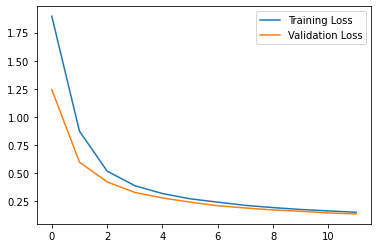

In [11]:
plt.plot(loss_history,label='Training Loss')  
plt.plot(val_loss_history,label='Validation Loss')  
plt.legend()  
plt.show()

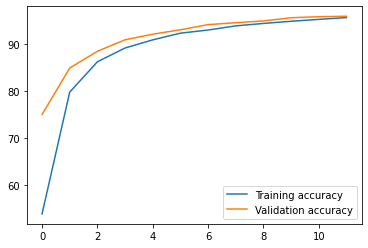

In [12]:
plt.plot(correct_history,label='Training accuracy')  
plt.plot(val_correct_history,label='Validation accuracy')  
plt.legend()  
plt.show() 